In [13]:
#slightly modify the directory name
with open('car-images.txt') as f_r:
    lines = f_r.readlines()
with open('new-car-images.txt', "w") as f_w:    
    for l in lines:
        fname, domain, target = l.strip().split(' ')
        dot, root, sub, make, model, year, picture = fname.strip().split('/')
        sub = 'image'
        f_w.write(dot+'/'+root+'/'+sub+'/'+make+'/'+model+'/'+year+'/'+picture+'\n')

In [14]:
#Verify every line in the new-car-images.txt correspond to a car image
with open('new-car-images.txt') as f_r:
    lines = f_r.readlines()
for l in lines:
    fname = l.strip()
    open(fname,'r')

In [30]:
import os 
#prepare a very big car-image to model number mapping file
with open('full_name_model.txt','w') as f_w:    
    for make in os.listdir('./data/image'):
        for model in os.listdir('./data/image/'+make):
            for year in os.listdir('./data/image/'+make+'/'+model):
                for fn in os.listdir('./data/image/'+make+'/'+model+'/'+year):
                    f_w.write('./data/image/'+make+'/'+model+'/'+year+'/'+fn +' ' + model +'\n')

In [11]:
import os 
with open('full_name_model.txt') as f:
    lines = f.readlines()
print(type(lines))
print(lines[0])

<class 'list'>
./data/image/1/1101/2011/07b90decb92ba6.jpg 1101



In [28]:
import skimage.io as skio
size_list = []
for i in range(len(lines)):
    filename, model = lines[i].strip().split(' ')
    size_list.append(skio.imread(filename).shape)
    print("\r".format(i) + str(i), end="")
size_set = list(set(size_list))


136725

TypeError: can only concatenate tuple (not "str") to tuple

In [33]:
MAX_COUNT = 0
MAX_SIZE = (0,0,0)
for size in size_set:
    count = size_list.count(size)
    print(str(size) + ':  '+ str(count) + '\n')
    if count > MAX_COUNT:
        MAX_SIZE = size
        MAX_COUNT = count
print('MAX' + str(MAX_SIZE) + ': ' + str(MAX_COUNT) +'\n')

(554, 800, 3):  2

(491, 800, 3):  1

(638, 800, 3):  1

(385, 800, 3):  1

(532, 800, 3):  1

(374, 543, 3):  2

(541, 894, 3):  1

(627, 908, 3):  420

(659, 1018, 3):  1

(562, 800, 3):  1

(393, 800, 3):  1

(871, 1170, 3):  1

(624, 906, 3):  84

(426, 612, 3):  3

(453, 648, 3):  3

(553, 800, 3):  1

(637, 800, 3):  1

(350, 640, 3):  1

(468, 800, 3):  1

(451, 800, 3):  7

(365, 583, 3):  1

(392, 562, 3):  1

(561, 800, 3):  2

(719, 1024, 3):  1

(498, 800, 3):  177

(534, 756, 3):  1

(391, 800, 3):  3

(522, 800, 3):  1

(459, 800, 3):  2

(628, 800, 3):  1

(520, 737, 3):  3

(626, 902, 3):  18

(370, 640, 3):  1

(524, 908, 3):  1

(513, 800, 3):  1

(414, 625, 3):  1

(718, 1031, 3):  1

(521, 800, 3):  2

(458, 800, 3):  1

(324, 476, 3):  1

(626, 908, 3):  50092

(436, 886, 3):  1

(376, 800, 3):  1

(800, 1140, 3):  1

(375, 800, 3):  1

(513, 909, 3):  6

(432, 620, 3):  1

(911, 800, 3):  1

(541, 859, 3):  1

(618, 897, 3):  1

(348, 508, 3):  5

(512, 800, 3):  

(634, 800, 3):  2

(626, 909, 3):  474

(626, 903, 3):  13

(574, 800, 3):  1

(594, 908, 3):  1

(405, 800, 3):  1

(565, 1024, 3):  1

(556, 800, 3):  2

(493, 800, 3):  4

(403, 611, 3):  1

(589, 906, 3):  1

(565, 800, 3):  6

(502, 800, 3):  48

(787, 1122, 3):  1

(526, 800, 3):  1

(428, 615, 3):  1

(409, 619, 3):  1

(510, 800, 3):  1

(341, 498, 3):  1

(541, 904, 3):  3

(534, 800, 3):  2

(492, 800, 3):  1

(471, 800, 3):  1

(564, 796, 3):  2

(342, 500, 3):  16

(395, 800, 3):  2

(403, 581, 3):  9

(632, 800, 3):  1

(482, 900, 3):  1

(541, 844, 3):  51

(570, 908, 3):  3

(541, 948, 3):  18

(1167, 800, 3):  3

(541, 910, 3):  1

(482, 687, 3):  1

(555, 800, 3):  1

(375, 543, 3):  1

(499, 709, 3):  5

(621, 906, 3):  1

(386, 800, 3):  1

(533, 800, 3):  2

(385, 557, 3):  1

(620, 900, 3):  36

(713, 800, 3):  1

MAX(567, 800, 3): 55141



(626, 908, 3)


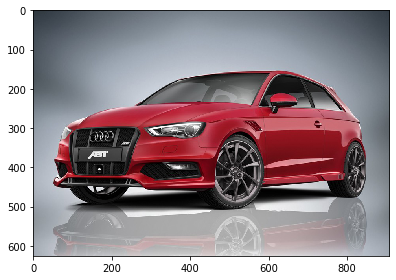

In [45]:
import skimage.transform
filename, model = lines[1].strip().split(' ')
image = skio.imread(filename)
print(image.shape)
skio.imshow(image)

(567, 800, 3)


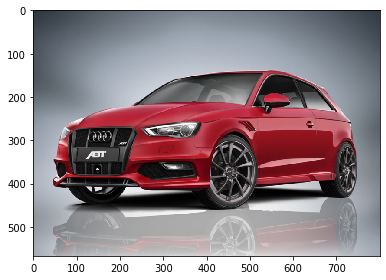

In [44]:
image = skimage.transform.resize(image, (567, 800, 3))
print(image.shape)
skio.imshow(image)

In [79]:
import torch
sum_data = torch.zeros([3])
for i in range(len(lines)):
    filename, _ = lines[i].strip().split(' ')
    image = skio.imread(filename)
    image = skimage.transform.resize(image, (567, 800, 3))
    tensor = torch.from_numpy(image) / 255.
    tensor = torch.sum(tensor, (0, 1))
    sum_data += tensor
    print("\r" + str(i), end="")
sum_data = sum_data / len(lines)
print(sum_data)

39

KeyboardInterrupt: 

In [67]:
sum_data / (567*800)

tensor([0.0019, 0.0018, 0.0018])

In [77]:
filename, _ = lines[0].strip().split(' ')
image = skio.imread(filename)
image = skimage.transform.resize(image, (567, 800, 3))
tensor = torch.from_numpy(image) / 255.
print(torch.std(tensor, dim = (0,1)))

tensor([0.0011, 0.0011, 0.0011], dtype=torch.float64)


In [85]:
from PIL import Image
from torchvision import transforms
transform = transforms.Compose([
    transforms.CenterCrop(( 567,800)),
    transforms.ToTensor()
]
)          
with open('full_name_model.txt','r') as f_r:
    lines = f_r.readlines()

# f_name , _ =lines[0].strip().split(' ')
# image = Image.open(f_name)
# image = transform(image)
# print(image.size())

for index, l in enumerate(lines):
    f_name , _ =l.strip().split(' ') 
    image = Image.open(f_name)
    image = transform(image)
    print("\r".format(i) + str(i), end="")
    if(image.size() != torch.Size([3, 567, 800])):
        print(l)

40./data/image/116/1151/2014/bdb3633701473c.jpg 1151

40

In [4]:
from PIL import Image
import torch 
import torchvision
transform = torchvision.transforms.Compose([
    torchvision.transforms.CenterCrop(( 567,800)),
    torchvision.transforms.ToTensor()
]
)


with open('full_name_model.txt', 'r') as f_r:
    lines = f_r.readlines()
print('original line number'+ str(len(lines)))
for i,l in enumerate(lines):
    filename, _ = l.strip().split(' ')
    image = transform(Image.open(filename))
    print("\r".format(i) + str(i), end="")
    if(image.size() != torch.Size([3, 567, 800])):
        print('')
        print(l)
        lines.remove(l)
print('updates line number'+ str(len(lines)))

original line number136726
18541
./data/image/116/1151/2014/bdb3633701473c.jpg 1151

136724updates line number136725


torch.Size([4, 567, 800])
(552, 800, 4)


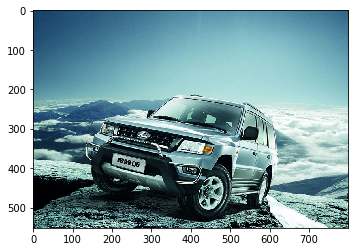

In [16]:
import numpy as np
image = transform(Image.open('./data/image/116/1151/2014/bdb3633701473c.jpg'))
print(image.size())
plt.imshow(Image.open('./data/image/116/1151/2014/bdb3633701473c.jpg'))
print(np.array(Image.open('./data/image/116/1151/2014/bdb3633701473c.jpg')).shape)

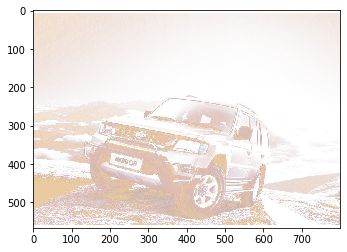

In [11]:
import matplotlib.pyplot as plt
plt.imshow( image.permute(1, 2, 0)  )

In [18]:
with open('full_model_name_updated.txt', 'w') as f_w:
    for l in lines:
        f_w.write(l)